# Importar librerías

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import statsmodels.api as sm
sm.tsa.statespace.SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from ipywidgets import interact
import itertools
import warnings
warnings.filterwarnings("ignore")

# Limpieza y organización de datos

In [2]:
df = pd.read_csv('pelis_fa_pr06.csv').drop('Unnamed: 0', axis=1)
df.head()

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
0,0,Fahrenheit 9/11,2004,2000,['Michael Moore'],['Documental'],"['Documental', '11-S', 'Guerra de Iraq']",Estados Unidos,6.99,69775,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,['Kathryn Bigelow'],"['Jessica Chastain', 'Joel Edgerton', 'Taylor ...","['Thriller', 'Acción', 'Drama', 'Terrorismo', ...",Estados Unidos,6.79,36704,Película
2,2,La última noche,2002,2000,['Spike Lee'],"['Edward Norton', 'Philip Seymour Hoffman', 'B...","['Drama', 'Película de culto', '11-S']",Estados Unidos,7.49,33793,Película
3,3,Zeitgeist: The Movie,2007,2000,['Peter Joseph'],['Documental'],"['Documental', 'Religión', '11-S', 'Cine indep...",Estados Unidos,7.36,21808,Película
4,4,United 93 (Vuelo 93),2006,2000,['Paul Greengrass'],"['Christian Clemenson', 'Cheyenne Jackson', 'B...","['Drama', '11-S', 'Basado en hechos reales', '...",Estados Unidos,6.70,19146,Película


In [3]:
# Convertimos el género a listas

df['genero'] = df['genero'].apply(lambda x: eval(x))

In [4]:
# Creamos un nuevo df con explode()

gr = df.explode('genero').set_index('año')[['genero', 'id_peli']]
gr.head()

,genero,id_peli
año,,
2004,Documental,0
2004,11-S,0
2004,Guerra de Iraq,0
2012,Thriller,1
2012,Acción,1


In [5]:
# Hacemos pivot para que cuente el nº pelis por año

gr = gr.pivot_table(index='año', values='id_peli', columns='genero', aggfunc='count').fillna(0)
gr.head()

genero,11-S,3-D,Abusos sexuales,Acción,Acoso escolar/bullying,Adolescencia,Adopción,Ajedrez,Alcoholismo,Alpinismo/Escalada,...,Western,Western futurista,Wrestling/Lucha libre,Wuxia,Yakuza & Triada,Young Adult,Zombis,eSports,África,Ópera
año,,,,,,,,,,,,,,,,,,,,,
1878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Filtramos a partir de 1920

gr = gr[gr.index > 1919]
gr.head()

genero,11-S,3-D,Abusos sexuales,Acción,Acoso escolar/bullying,Adolescencia,Adopción,Ajedrez,Alcoholismo,Alpinismo/Escalada,...,Western,Western futurista,Wrestling/Lucha libre,Wuxia,Yakuza & Triada,Young Adult,Zombis,eSports,África,Ópera
año,,,,,,,,,,,,,,,,,,,,,
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualización top 20 géneros

## Obtener top 20 géneros

In [7]:
# Obtenemos los 20 géneros más populares

generos = df.explode('genero')['genero'].value_counts()[0:20].index.to_list()
generos

['Drama',
 'Comedia',
 'Animación',
 'Acción',
 'Aventuras',
 'Thriller',
 'Serie de TV',
 'Fantástico',
 'Documental',
 'Terror',
 'Romance',
 'Ciencia ficción',
 'Intriga',
 'Crimen',
 'Cortometraje (animación)',
 'Secuela',
 'Telefilm',
 'Infantil',
 'Basado en hechos reales',
 'Biográfico']

## Visualización

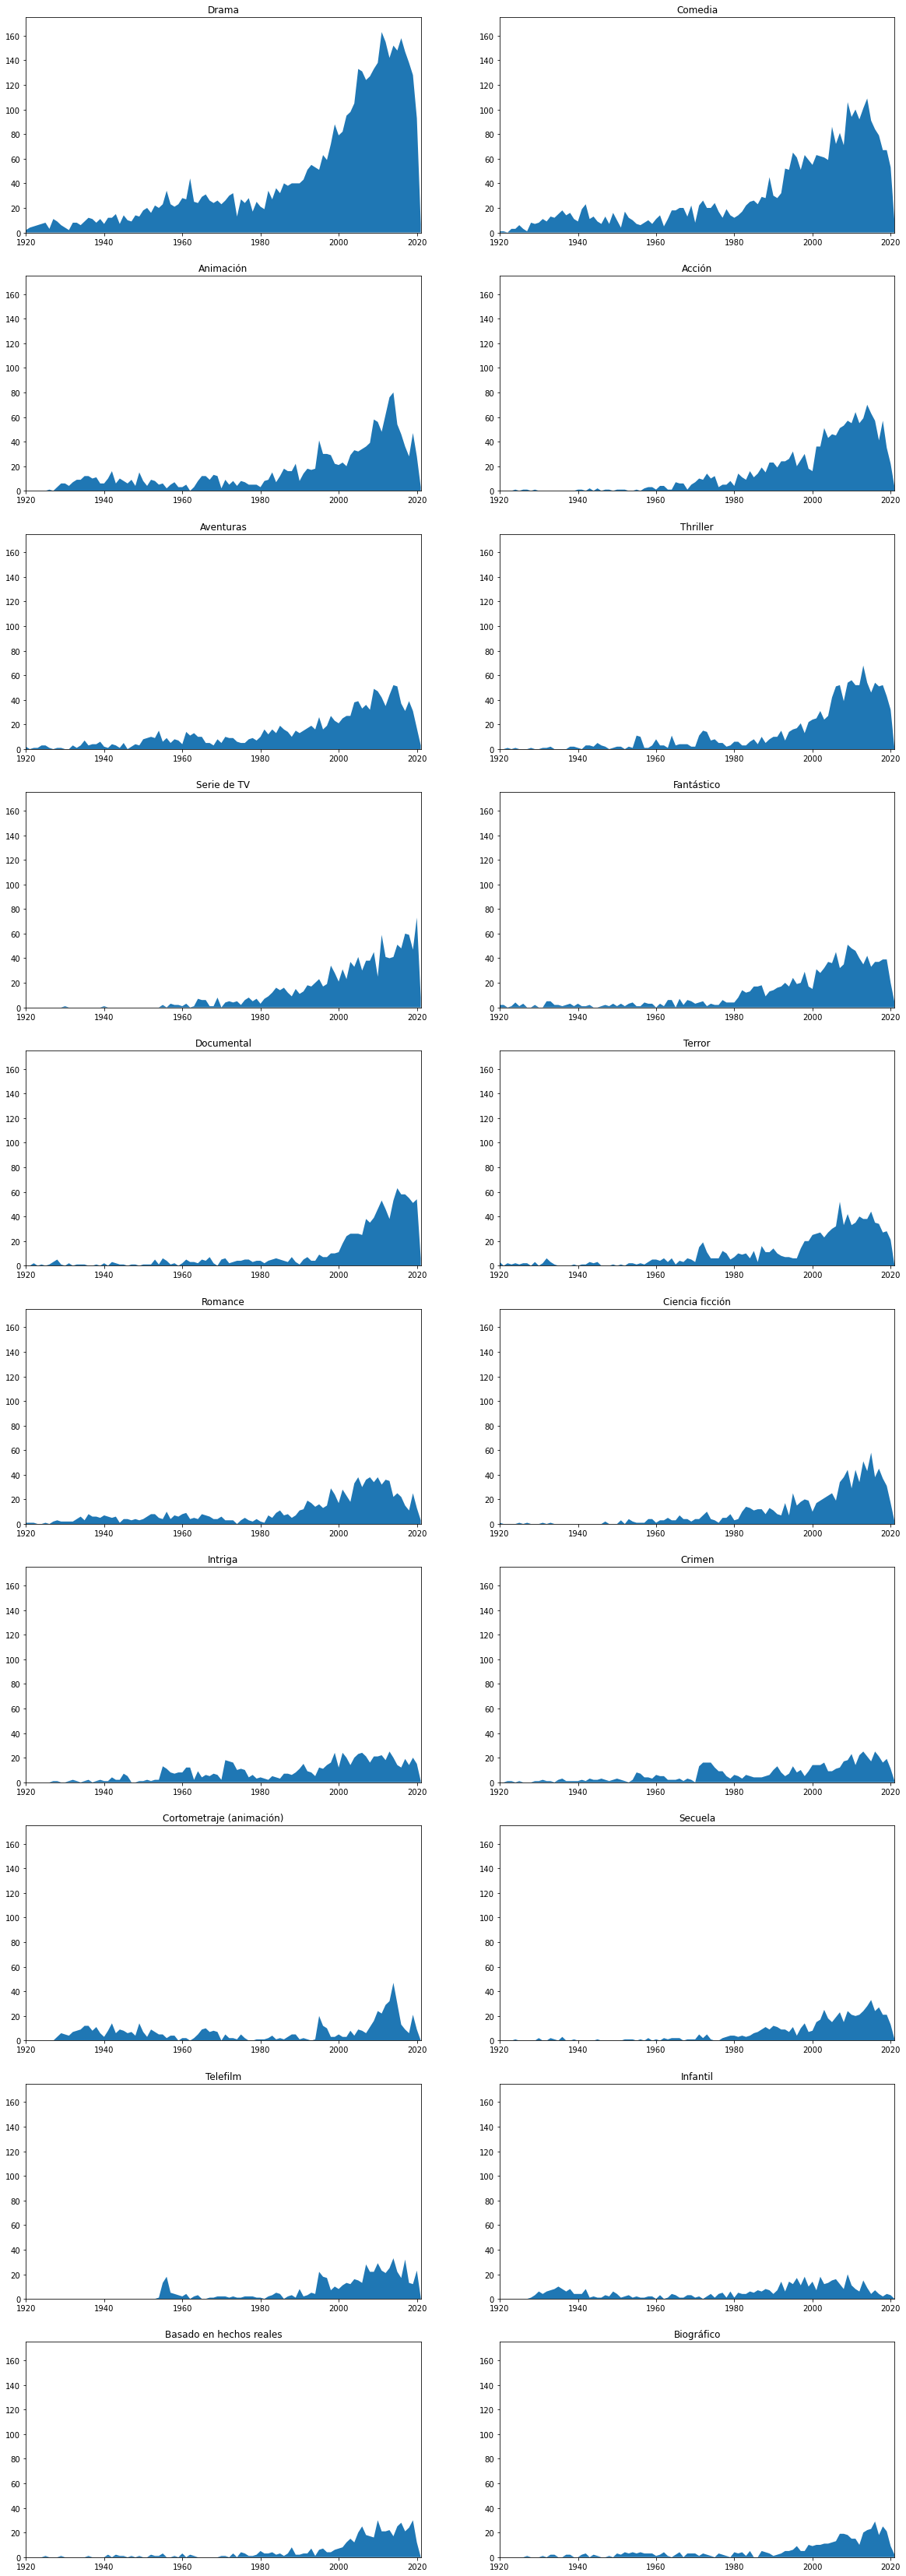

In [8]:
# Representamos la evolución del nº pelis por género desde 1920 antes de cambiar el año a formato fecha

fig, ax = plt.subplots(10,2, figsize=(20,60))

for i in range(10):
    for j in range(2):
        currgen = generos.pop(0) # Con .pop() extrae el primer valor de la tabla y nos ahorramos otra iteración
        plt.sca(ax[i][j])
        plt.stackplot(gr.index, gr[currgen])
        plt.title(currgen)
        plt.xlim(1920,2021)
        plt.ylim(0, 175)

## Cambio a formato fecha para time series

In [9]:
# Recargamos la variable 'generos' otra vez, ya que anteriormente hemos usado .pop() y se ha vaciado

generos = df.explode('genero')['genero'].value_counts()[0:20].index.to_list()

In [10]:
plt.rcParams['figure.figsize'] = (12,8)

In [11]:
# Ahora sí cambiamos a formato fecha para poder predecir

gr.index = pd.to_datetime(gr.index, format="%Y")

In [12]:
gr.head()

genero,11-S,3-D,Abusos sexuales,Acción,Acoso escolar/bullying,Adolescencia,Adopción,Ajedrez,Alcoholismo,Alpinismo/Escalada,...,Western,Western futurista,Wrestling/Lucha libre,Wuxia,Yakuza & Triada,Young Adult,Zombis,eSports,África,Ópera
año,,,,,,,,,,,,,,,,,,,,,
1920-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1922-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924-01-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Predicción

In [13]:
# Aunque los valores se pueden sacar a través de las gráficas plot_acf() y plot_pacf(), le damos estos valores para que itere

# Hacemos esto porque la gráfica será interactiva y para cada género cambiarán nuestros valores

p = [0,1,2] 
d = [0,1,2] 
q = [0,1,2] 

In [14]:
plt.rcParams['figure.figsize'] = (16,8)

In [15]:
def predcovid():
    @interact(genero=generos, limit=list(range(2020,2041,1)))
    def predict2(genero, limit=2022):
        """
        Predice el número de pelis por género en función de si se tiene en cuenta
        el bajón de 2020 por el Coronavirus o no
        """
    
        # -- CON COVID -> END YEAR = 2020
        
        # Creamos time series 
        ts1 = gr.loc[:'2020',genero]
        
        # Asignamos valores para que itere y busque el mejor resultado posible
        # No hay 's' porque sabemos que no hay estacionalidad
        p1 = [0,1,2] 
        d1 = [0,1,2] 
        q1 = [0,1,2] 
    
        # Creamos diccionario vacío para que acumule los valores de cada combinación
        dic1 = {}
        
        # Iteramos para sacar los valores de los órdenes
        for ordr in list(itertools.product(p1,d1,q1)):
            mod1 = SARIMAX(ts1, order=ordr, enforce_stationarity=True)
            res1 = mod1.fit()     # Entrenamos el modelo
            dic1[ordr] = res1.aic  # Acumulamos los resultados en un diccionario
            #print(f'Order: {ordr}, result: {res.aic}')
            
        # Ahora haremos uso de ese valor mínimo del diccionario para predecir
        #print(f'Diccionario: {dic}')
        params1 = min(dic1, key=dic1.get)
        #print(f'Params: {params}')
            
        model1 = SARIMAX(ts1, order=params1, enforce_stationarity=True)
        results1 = model1.fit()
        
        # -- SIN COVID -> END YEAR = 2018
    
        # Creamos time series 
        ts2 = gr.loc[:'2018',genero]
        
        # Asignamos valores para que itere y busque el mejor resultado posible
        # No hay 's' porque sabemos que no hay estacionalidad
        p2 = [0,1,2] 
        d2 = [0,1,2] 
        q2 = [0,1,2] 
    
        # Creamos diccionario vacío para que acumule los valores de cada combinación
        dic2 = {}
        
        # Iteramos para sacar los valores de los órdenes
        for ordr in list(itertools.product(p2,d2,q2)):
            mod2 = SARIMAX(ts2, order=ordr, enforce_stationarity=True)
            res2 = mod2.fit()     # Entrenamos el modelo
            dic2[ordr] = res2.aic  # Acumulamos los resultados en un diccionario
            #print(f'Order: {ordr}, result: {res.aic}')
            
        # Ahora haremos uso de ese valor mínimo del diccionario para predecir
        #print(f'Diccionario: {dic}')
        params2 = min(dic2, key=dic2.get)
        #print(f'Params: {params}')
            
        model2 = SARIMAX(ts2, order=params2, enforce_stationarity=True)
        results2 = model2.fit()
        
        # VISUALIZACIÓN
            
        # Imprimimos los datos reales

        gr.loc[:'2020',genero].plot(label='Real data')
        
        # Imprimimos la predicción con covid
        ax1 = results1.get_prediction(start=f'2020-01-01', end=f'{limit}-12-31').predicted_mean.plot(label='Predicción con COVID', color='r')    
        
        # Imprimimos la predicción sin covid
        ax2 = results2.get_prediction(start=f'2018-01-01', end=f'{limit}-12-31').predicted_mean.plot(label='Predicción sin COVID', color='g')
        
        ax1.set_title('Predicción de nº pelis por género', fontsize='x-large')
        ax1.legend(loc="upper left", fontsize='x-large')
           
        # Imprimimos el modelo
    #print(results.summary())
    
    

# Time series predictor

El objetivo de este programa es calcular el número de películas de cada uno de los principales géneros que habrá en los próximos años.

Existe la opción de evitar el "efecto Covid-19", es decir, ver cómo cambiaría la predicción si no se hubieran tenido en cuenta los últimos años, en los cuales el número de películas ha disminuido considerablemente.

In [16]:
predcovid()

interactive(children=(Dropdown(description='genero', options=('Drama', 'Comedia', 'Animación', 'Acción', 'Aven…